In [45]:
#BIBLIOTECAS

import pandas as pd #formata o dataframe
import numpy as np #tratar vetores e construir gráficos
from sklearn.preprocessing  import MinMaxScaler, LabelEncoder #processamento de dados
from sklearn.model_selection import train_test_split #divide os dados entre treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #verifica acurácio do modelo
from sklearn.naive_bayes import GaussianNB #modelo de classificação Naive Bayes
import seaborn as sns #construção de gráficos
import matplotlib.pyplot as plt #construção de gráficos
from sklearn.svm import SVC #algoritmo SVC
from sklearn.linear_model import LinearRegression #modelo de regressão linear
from sklearn.metrics import mean_squared_error #R2

In [46]:
#from google.colab import files
#uploaded = files.upload()
#arquivo = 'winequality-red.csv'
#winequality_1 = pd.read_csv(arquivo,sep=';')
winequality_1 = pd.read_csv (r'C:\Users\Alexandre\Desktop\ML_IGTI\Trabalho_Modulo_2\ATIVIDADE_2\winequality-red.csv',sep=';')

In [47]:
winequality_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
winequality_1.shape

(1599, 12)

In [49]:
winequality_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
perc_nulos = (winequality_1['residual sugar'].isnull().sum()/winequality_1['residual sugar'].sum())
print("Percentual de valores nulos da coluna residual sugar: {:.2%}".format(perc_nulos))

Percentual de valores nulos da coluna residual sugar: 0.00%


In [51]:
winequality_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
print("Desvio padrão da variável fixed acidity:",winequality_1['fixed acidity'].std())

Desvio padrão da variável fixed acidity: 1.7410963181276953


In [53]:
print("Mediana da variável residual sugar:",winequality_1['residual sugar'].median())

Mediana da variável residual sugar: 2.2


In [54]:
print("Correlação entre as variáveis fixed acidity e pH:",winequality_1['fixed acidity'].corr(winequality_1['pH']))

Correlação entre as variáveis fixed acidity e pH: -0.6829781945685311


In [55]:
print("Correlação entre as variáveis quality and alcohol:",winequality_1['quality'].corr(winequality_1['alcohol']))

Correlação entre as variáveis quality and alcohol: 0.4761663240011361


In [56]:
count_quality_5 = sum(1 for i in winequality_1['quality'] if i==(5.0))
print('Número de instância com qualidade igual a 5:',count_quality_5)

Número de instância com qualidade igual a 5: 681


In [57]:
acidity_col = winequality_1['fixed acidity'].values.reshape(-1,1)
#nova escala
scaler = MinMaxScaler()
scaled = scaler.fit_transform(acidity_col)
print("Menor valor:", min(scaled))
print("Maior valor:", max(scaled))

Menor valor: [0.]
Maior valor: [1.]


In [58]:
#define entrada e saida
X_ = winequality_1.iloc[:,:-1]
y = winequality_1.iloc[:,-1]

In [59]:
#entrada normalizada
X=scaler.transform(X_)
print(X)

[[ 0.24778761 -0.34513274 -0.40707965 ... -0.09646018 -0.35752212
   0.42477876]
 [ 0.28318584 -0.32920354 -0.40707965 ... -0.12389381 -0.34690265
   0.46017699]
 [ 0.28318584 -0.33982301 -0.40353982 ... -0.11858407 -0.34955752
   0.46017699]
 ...
 [ 0.15044248 -0.3619469  -0.39557522 ... -0.10442478 -0.34070796
   0.56637168]
 [ 0.11504425 -0.35       -0.39646018 ... -0.09115044 -0.34424779
   0.49557522]
 [ 0.12389381 -0.37964602 -0.36548673 ... -0.10707965 -0.34867257
   0.56637168]]


In [60]:
#divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split (X,y,test_size =0.30,random_state=1) #30% para teste

In [61]:
#normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #normalização

X_train = scaler.transform(X_train)
x_test - scaler.transform(x_test)

array([[ 0.10795296,  0.30635008, -2.21451065, ..., -1.52992503,
        -0.34815189,  0.47237617],
       [ 0.15501703, -0.90671276, -0.43613517, ...,  0.22114683,
        -0.1760163 ,  0.72509693],
       [-0.64507221,  0.69232462, -1.91811474, ...,  0.6589148 ,
        -0.57766601, -0.20154587],
       ...,
       [ 0.3903374 , -1.45810496, -0.09033993, ...,  0.59637652,
         0.45514753,  1.31477871],
       [ 0.71978591, -0.57587744,  0.84824713, ..., -0.40423598,
        -0.11863777,  0.2196554 ],
       [ 0.67272184, -0.1899029 , -0.48553449, ..., -0.15408285,
        -0.11863777, -0.37002638]])

In [62]:
#treinamento
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #5 vizinhos
classifier.fit(X_train,y_train) #aplica classificação

KNeighborsClassifier()

In [63]:
#realiza previsão
y_pred = classifier.predict(x_test)

In [64]:
#matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0   1   1   0   0]
 [  0   0  14   7   0   0]
 [  0   0 187  20   0   0]
 [  0   0 161  34   0   0]
 [  0   0  39  13   0   0]
 [  0   0   1   2   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.46      0.90      0.61       207
           6       0.44      0.17      0.25       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.46       480
   macro avg       0.15      0.18      0.14       480
weighted avg       0.38      0.46      0.37       480



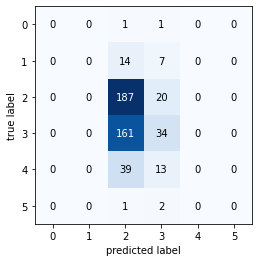

In [65]:
#plot
matriz_confusao = confusion_matrix(y_test, y_pred)
#import mlxtend
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred,y_test))

Acurácia para a classificação utilizando o KNN:   0.46041666666666664
